![title](img/pod_slogan.png)

--------------

**_© Todos os direitos reservados - 2018-2020 POWER OF DATA_**

--------------

# Case Final - US Accidents

Este é um conjunto de dados de acidentes de carro em todo o país, que cobre 49 estados dos EUA (não contém Alaska e Hawaii). Os dados de acidentes são coletados de fevereiro de 2016 a junho de 2020, usando duas APIs que fornecem streaming de dados de incidentes (ou eventos) de tráfego.

Essas APIs transmitem dados de tráfego capturados por uma variedade de entidades, como os Estados Unidos e departamentos estaduais de transporte, agências de aplicação da lei, câmeras de tráfego e sensores de tráfego nas redes rodoviárias. Atualmente, existem cerca de 3,5 milhões de registros de acidentes neste conjunto de dados. Verifique aqui para saber mais sobre este conjunto de dados.



**_Fontes:_**

- https://www.kaggle.com/sobhanmoosavi/us-accidents

- Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “**_A Countrywide Traffic Accident Dataset._**”, 2019.

- Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "**_Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights._**" In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

## 1) Instalar e Importar Bibliotecas

In [1]:
### Instalar bibliotecas ###

#!pip install pandas
#!pip install pandas
#!pip install matplotlib
#conda install --channel conda-forge geopandas ## Rodar no Prompt do Anaconda
#!pip install glob
#!pip install folium

In [2]:
### Importar bibliotecas ###

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import folium
%matplotlib inline

C:\Users\gusb1\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2) Importar Dados

In [3]:
### Importando Dados ###

## Ler Dados
sys_path = 'C:/Users/gusb1/OneDrive/Área de Trabalho/Projetos/PoD MeetUp - GeoDataScience com Python/Dados/'
shp_path = 'US Accidents/USA_States/USA_States.shp'
    
US_states = gpd.read_file(sys_path + shp_path)
US_states.shape

(51, 4)

In [4]:
US_states.head()

STATE_NAME STATE_FIPS STATE_ABBR  \
0    Washington         53         WA   
1       Montana         30         MT   
2         Maine         23         ME   
3  North Dakota         38         ND   
4  South Dakota         46         SD   

                                            geometry  
0  MULTIPOLYGON (((-122.40202 48.22522, -122.4628...  
1  POLYGON ((-111.47543 44.70216, -111.48080 44.6...  
2  MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...  
3  POLYGON ((-98.73044 45.93827, -99.00683 45.939...  
4  POLYGON ((-102.78838 42.99530, -103.00588 42.9...

In [5]:
US_states.crs = ('epsg:4326')

In [6]:
US_states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

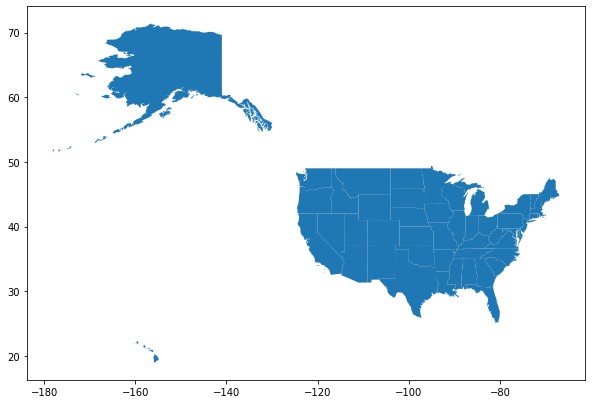

In [7]:
US_states.plot(figsize=(10,10))

In [8]:
### Importando Dados ###

## Ler Dados
sys_path = 'C:/Users/gusb1/OneDrive/Área de Trabalho/Projetos/PoD MeetUp - GeoDataScience com Python/Dados/'
csv_path = 'US Accidents/US_Accidents_June20.csv'
    
US_accidents = pd.read_csv(sys_path + csv_path)
US_accidents.shape

(3513617, 49)

In [9]:
### Inspecionando Dados ###

US_accidents.head()

ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Roundabout Station   Stop  \
0  39.865147 -84.058723      NaN      NaN  ...       False   False  False   
1  39.928059 -82.831184      NaN      NaN  ...       False   False  False   
2  39.063148 -84.032608      NaN      NaN  ...       False   False  False   
3  39.747753 -84.205582      NaN      NaN  ...       False   False  False   
4  39.627781 -84.188354      NaN      NaN  ...       False   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   
2           False           True        False          Night          Night   
3           False          False        False          Night            Day   
4           False           True        False            Day            Day   

  Nautical_Twilight Astronomical_Twilight  
0             Night                 Night  
1             Night                   Day  
2               Day                   Day  
3               Day                   Day  
4               Day                   Day  

[5 rows x 49 columns]

In [10]:
### Verificando Colunas ###

US_accidents.columns.tolist()

['ID',
 'Source',
 'TMC',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

## 3) Análise Exploratória

### Variáveis Geográficas

In [11]:
US_accidents[['ID','City','County','State','Zipcode','Start_Lat','Start_Lng']].head()

ID          City      County State     Zipcode  Start_Lat  Start_Lng
0  A-1        Dayton  Montgomery    OH       45424  39.865147 -84.058723
1  A-2  Reynoldsburg    Franklin    OH  43068-3402  39.928059 -82.831184
2  A-3  Williamsburg    Clermont    OH       45176  39.063148 -84.032608
3  A-4        Dayton  Montgomery    OH       45417  39.747753 -84.205582
4  A-5        Dayton  Montgomery    OH       45459  39.627781 -84.188354

### Variáveis de Data

In [12]:
# Converter colunas de data para o formato "datetype"

US_accidents['Start_Time'] = pd.to_datetime(US_accidents['Start_Time'], errors='coerce')
US_accidents['End_Time'] = pd.to_datetime(US_accidents['End_Time'], errors='coerce')

# Extrair ano, mês, dia, hora e dia da semana

US_accidents['Year'] = US_accidents['Start_Time'].dt.year
US_accidents['Month'] = US_accidents['Start_Time'].dt.strftime('%b')
US_accidents['Day'] = US_accidents['Start_Time'].dt.day
US_accidents['Hour'] = US_accidents['Start_Time'].dt.hour
US_accidents['Weekday'] = US_accidents['Start_Time'].dt.strftime('%a')

# Converter a diferença do tempo de acidente em minutos

US_accidents['Time_Duration(min)'] = round((US_accidents['End_Time']-US_accidents['Start_Time'])/np.timedelta64(1,'m'))

# Remover durações negativas

US_accidents = US_accidents[US_accidents['Time_Duration(min)']>=0]

US_accidents.head()

ID    Source    TMC  Severity          Start_Time            End_Time  \
0  A-1  MapQuest  201.0         3 2016-02-08 05:46:00 2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2 2016-02-08 06:07:59 2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2 2016-02-08 06:49:27 2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3 2016-02-08 07:23:34 2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2 2016-02-08 07:39:07 2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Sunrise_Sunset Civil_Twilight  \
0  39.865147 -84.058723      NaN      NaN  ...           Night          Night   
1  39.928059 -82.831184      NaN      NaN  ...           Night          Night   
2  39.063148 -84.032608      NaN      NaN  ...           Night          Night   
3  39.747753 -84.205582      NaN      NaN  ...           Night            Day   
4  39.627781 -84.188354      NaN      NaN  ...             Day            Day   

   Nautical_Twilight Astronomical_Twilight  Year Month Day Hour Weekday  \
0              Night                 Night  2016   Feb   8    5     Mon   
1              Night                   Day  2016   Feb   8    6     Mon   
2                Day                   Day  2016   Feb   8    6     Mon   
3                Day                   Day  2016   Feb   8    7     Mon   
4                Day                   Day  2016   Feb   8    7     Mon   

  Time_Duration(min)  
0              314.0  
1               30.0  
2               30.0  
3               30.0  
4               30.0  

[5 rows x 55 columns]

### Gerando GeoDataFrame

In [13]:
geo_US_accidents = gpd.GeoDataFrame(US_accidents,
                                    geometry=gpd.points_from_xy(US_accidents.Start_Lng, US_accidents.Start_Lat))
geo_US_accidents.crs = ('epsg:4326')
geo_US_accidents.head()

ID    Source    TMC  Severity          Start_Time            End_Time  \
0  A-1  MapQuest  201.0         3 2016-02-08 05:46:00 2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2 2016-02-08 06:07:59 2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2 2016-02-08 06:49:27 2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3 2016-02-08 07:23:34 2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2 2016-02-08 07:39:07 2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Civil_Twilight  \
0  39.865147 -84.058723      NaN      NaN  ...           Night   
1  39.928059 -82.831184      NaN      NaN  ...           Night   
2  39.063148 -84.032608      NaN      NaN  ...           Night   
3  39.747753 -84.205582      NaN      NaN  ...             Day   
4  39.627781 -84.188354      NaN      NaN  ...             Day   

  Nautical_Twilight  Astronomical_Twilight  Year Month Day Hour Weekday  \
0             Night                  Night  2016   Feb   8    5     Mon   
1             Night                    Day  2016   Feb   8    6     Mon   
2               Day                    Day  2016   Feb   8    6     Mon   
3               Day                    Day  2016   Feb   8    7     Mon   
4               Day                    Day  2016   Feb   8    7     Mon   

  Time_Duration(min)                    geometry  
0              314.0  POINT (-84.05872 39.86515)  
1               30.0  POINT (-82.83118 39.92806)  
2               30.0  POINT (-84.03261 39.06315)  
3               30.0  POINT (-84.20558 39.74775)  
4               30.0  POINT (-84.18835 39.62778)  

[5 rows x 56 columns]

In [14]:
geo_US_accidents.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
### Remover Alaska e Hawaii ###

US_states_new = US_states[US_states['STATE_NAME']!='Alaska']
US_states_new = US_states_new[US_states_new['STATE_NAME']!='Hawaii']
US_states_new.shape

(49, 4)

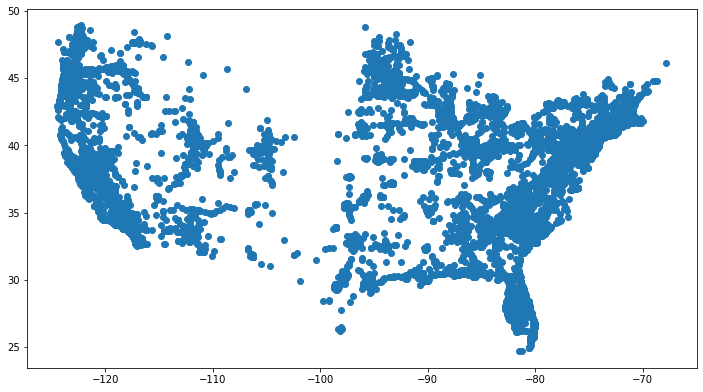

In [16]:
geo_US_accidents.sample(50000).plot(figsize=(12,12))

## 4) Análise Exploratória de Dados

### Resumo dos Dados

In [17]:
### Resumo dos Dados ###

print('Linhas     :', geo_US_accidents.shape[0])
print('Colunas    :', geo_US_accidents.shape[1])
print('\nFeatures : \n', geo_US_accidents.columns.tolist())
print('\nTipos :\n     :', geo_US_accidents.dtypes)
print('\nMissings       :', geo_US_accidents.isnull().sum().sort_values())
print('\nValores Únicos : \n', geo_US_accidents.nunique())

Linhas     : 3513600
Colunas    : 56

Features : 
 ['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'Time_Duration(min)', 'geometry']

Tipos :
     : ID                               object
Source                           object
TMC                             float64
Severity                          int64
Start_Time           

In [18]:
### Explorando Dados - Contando Valores Únicos ###

print(geo_US_accidents['Source'].unique())
print(geo_US_accidents['Description'].unique())
print(geo_US_accidents['Timezone'].unique())
print(geo_US_accidents['Amenity'].unique())
print(geo_US_accidents['City'].unique())
print(geo_US_accidents['County'].unique())
print(geo_US_accidents['State'].unique())
print(geo_US_accidents['Wind_Direction'].unique())
print(geo_US_accidents['Weather_Condition'].unique())

['MapQuest' 'MapQuest-Bing' 'Bing']
['Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.'
 'Accident on Brice Rd at Tussing Rd. Expect delays.'
 'Accident on OH-32 State Route 32 Westbound at Dela Palma Rd. Expect delays.'
 ... 'Ramp closed to Bristol St - Road closed due to accident.'
 'At Friars Rd - Accident. Center lane blocked.'
 'Ramp closed to The City Dr/Exit 14A - Road closed due to accident.']
['US/Eastern' 'US/Pacific' nan 'US/Central' 'US/Mountain']
[False  True]
['Dayton' 'Reynoldsburg' 'Williamsburg' ... 'Paron' 'Clarksdale'
 'American Fork-Pleasant Grove']
['Montgomery' 'Franklin' 'Clermont' ... 'Mellette' 'Hodgeman' 'Ness']
['OH' 'WV' 'CA' 'FL' 'GA' 'SC' 'NE' 'IA' 'IL' 'MO' 'WI' 'IN' 'MI' 'NJ'
 'NY' 'CT' 'MA' 'RI' 'NH' 'PA' 'KY' 'MD' 'VA' 'DC' 'DE' 'TX' 'WA' 'OR'
 'AL' 'TN' 'NC' 'KS' 'LA' 'OK' 'CO' 'UT' 'AZ' 'MN' 'MS' 'NV' 'ME' 'AR'
 'ID' 'VT' 'NM' 'ND' 'WY' 'SD' 'MT']
['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'Nor

### Visualizações Importantes - Mapas Estáticos

In [19]:
geo_US_accidents_sample = geo_US_accidents.sample(50000)

#### Coluna `Severity`

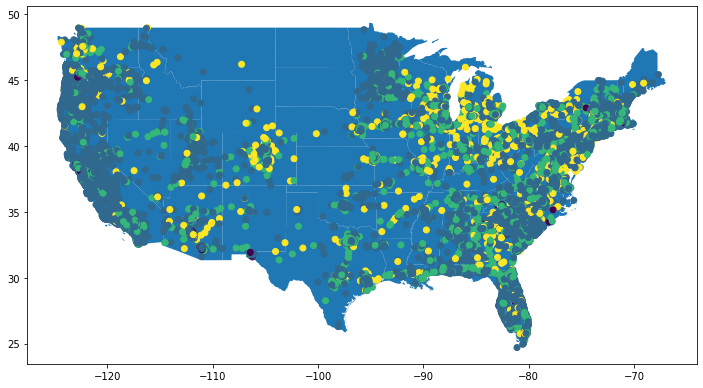

In [20]:
### Plotar Mapa Básico - Visualizar "Severity" ###

fig, ax = plt.subplots(1, 1, figsize=(12,12))

US_states_new.plot(ax= ax)

geo_US_accidents_sample.plot(ax= ax,
                             figsize=(12,12),
                             column='Severity')

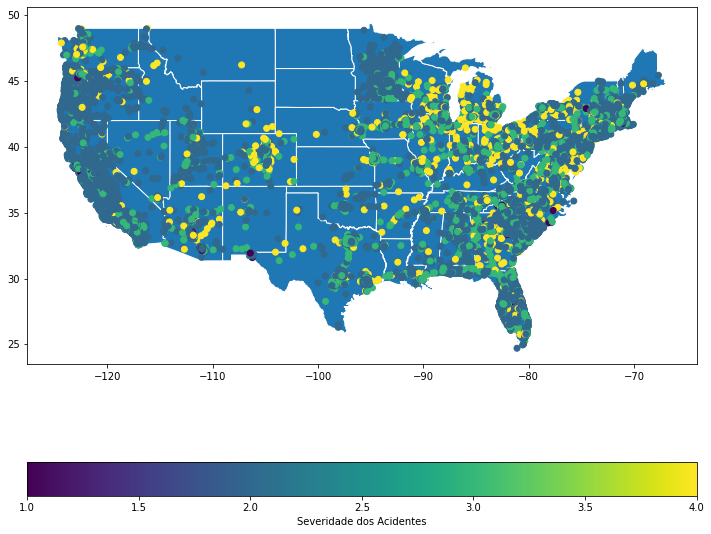

In [21]:
### Plotar Mapa Básico - Visualizar "Severity" ###

fig, ax = plt.subplots(1, 1, figsize=(12,12))

US_states_new.plot(ax= ax,
                   edgecolor='white')

geo_US_accidents_sample.plot(ax= ax,
                             figsize=(12,12),
                             column='Severity',
                             legend=True,
                             legend_kwds={'label': "Severidade dos Acidentes",
                                          'orientation': "horizontal"})

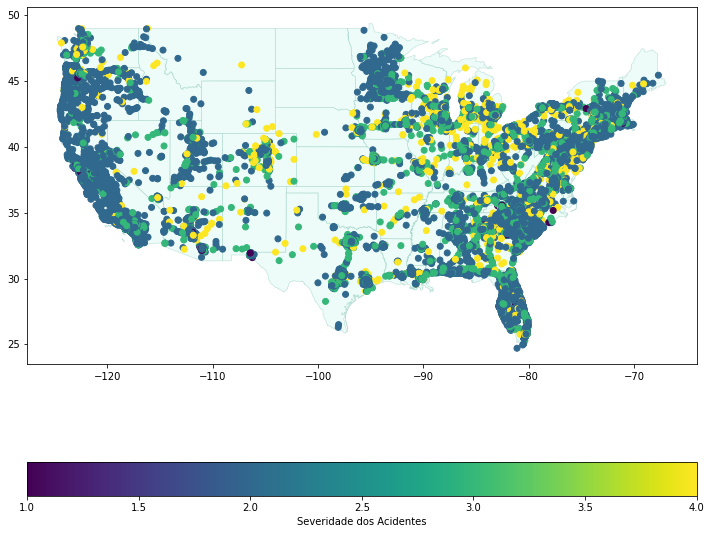

In [22]:
### Plotar Mapa Básico - Visualizar "Severity" ###

fig, ax = plt.subplots(1, 1, figsize=(12,12))

US_states_new.plot(ax=ax,
                   color='#e1faf4',
                   alpha=0.6,
                   edgecolor="#99cfc2",
                   linewidth=0.6)

geo_US_accidents_sample.plot(ax= ax,
                             figsize=(12,12),
                             column='Severity',
                             legend=True,
                             legend_kwds={'label': "Severidade dos Acidentes",
                                          'orientation': "horizontal"})

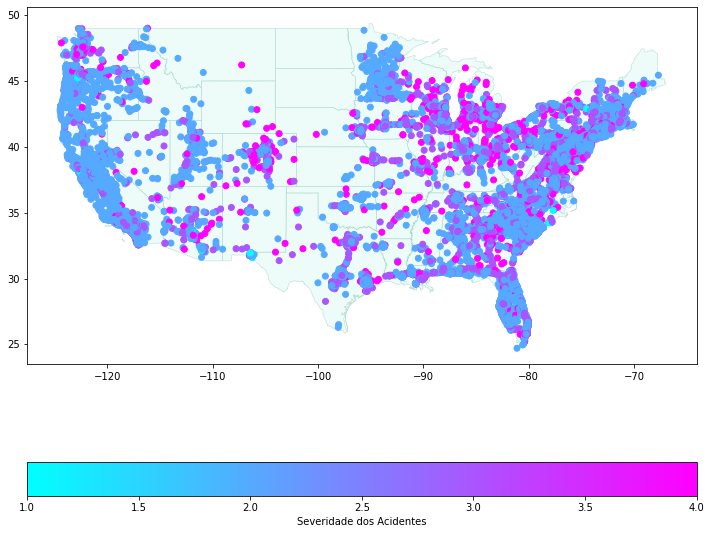

In [23]:
### Plotar Mapa Básico - Visualizar "Severity" ###

fig, ax = plt.subplots(1, 1, figsize=(12,12))

US_states_new.plot(ax=ax,
                   color='#e1faf4',
                   alpha=0.6,
                   edgecolor="#99cfc2",
                   linewidth=0.6)

geo_US_accidents_sample.plot(ax= ax,
                             figsize=(12,12),
                             column='Severity',
                             cmap='cool',
                             legend=True,
                             legend_kwds={'label': "Severidade dos Acidentes",
                                          'orientation': "horizontal"})

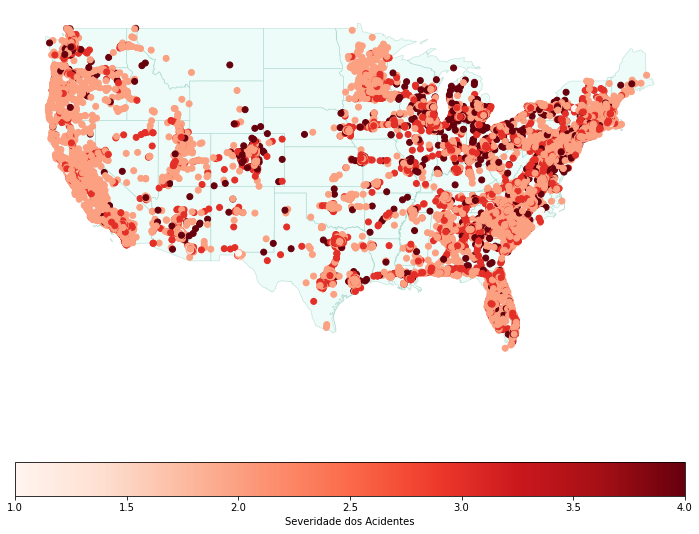

In [24]:
### Plotar Mapa Básico - Visualizar "Severity" ###

fig, ax = plt.subplots(1, 1, figsize=(12,12))

US_states_new.plot(ax=ax,
                   color='#e1faf4',
                   alpha=0.6,
                   edgecolor="#99cfc2",
                   linewidth=0.6)

geo_US_accidents_sample.plot(ax= ax,
                             figsize=(12,12),
                             column='Severity',
                             cmap='Reds',
                             legend=True,
                             legend_kwds={'label': "Severidade dos Acidentes",
                                          'orientation': "horizontal"})

ax.axis("off")
plt.show()

#### Coluna `Time_Duration(min)`

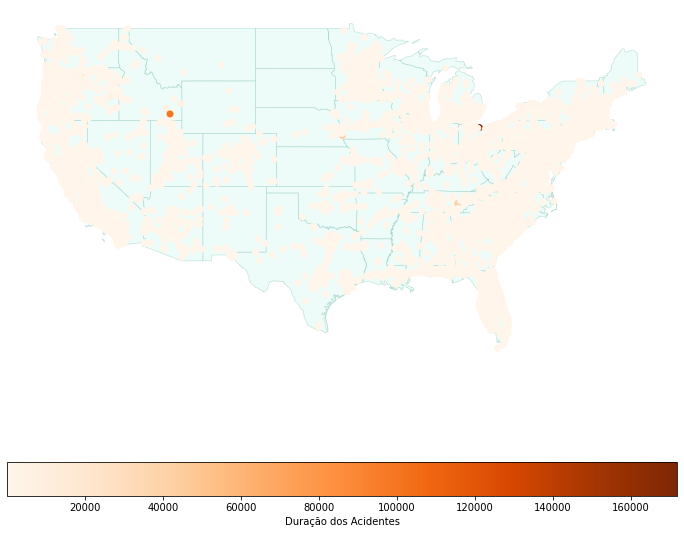

In [25]:
### Plotar Mapa Básico - Visualizar "Time_Duration(min)" ###

fig, ax = plt.subplots(1, 1, figsize=(12,12))

US_states_new.plot(ax=ax,
                   color='#e1faf4',
                   alpha=0.6,
                   edgecolor="#99cfc2",
                   linewidth=0.6)

geo_US_accidents_sample.plot(ax= ax,
                             figsize=(12,12),
                             column='Time_Duration(min)',
                             cmap='Oranges',
                             legend=True,
                             legend_kwds={'label': "Duração dos Acidentes",
                                          'orientation': "horizontal"})

ax.axis("off")
plt.show()

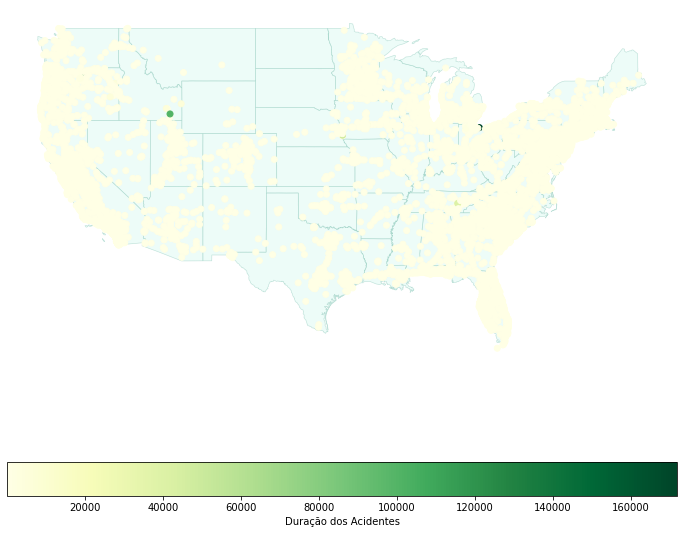

In [26]:
### Plotar Mapa Básico - Visualizar "Time_Duration(min)" ###

fig, ax = plt.subplots(1, 1, figsize=(12,12))

US_states_new.plot(ax=ax,
                   color='#e1faf4',
                   alpha=0.6,
                   edgecolor="#99cfc2",
                   linewidth=0.6)

geo_US_accidents_sample.plot(ax= ax,
                             figsize=(12,12),
                             column='Time_Duration(min)',
                             cmap='YlGn',
                             legend=True,
                             legend_kwds={'label': "Duração dos Acidentes",
                                          'orientation': "horizontal"})

ax.axis("off")
plt.show()

#### Coluna `Temperature(F)`

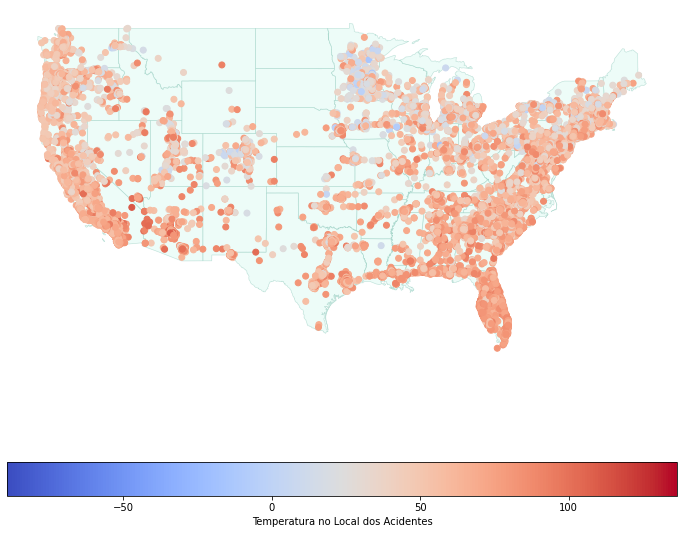

In [27]:
### Plotar Mapa Básico - Visualizar "Temperature(F)" ###

fig, ax = plt.subplots(1, 1, figsize=(12,12))

US_states_new.plot(ax=ax,
                   color='#e1faf4',
                   alpha=0.6,
                   edgecolor="#99cfc2",
                   linewidth=0.6)

geo_US_accidents_sample.plot(ax= ax,
                             figsize=(12,12),
                             column='Temperature(F)',
                             cmap='coolwarm',
                             legend=True,
                             legend_kwds={'label': "Temperatura no Local dos Acidentes",
                                          'orientation': "horizontal"})

ax.axis("off")
plt.show()

#### Coluna `Precipitation(in)`

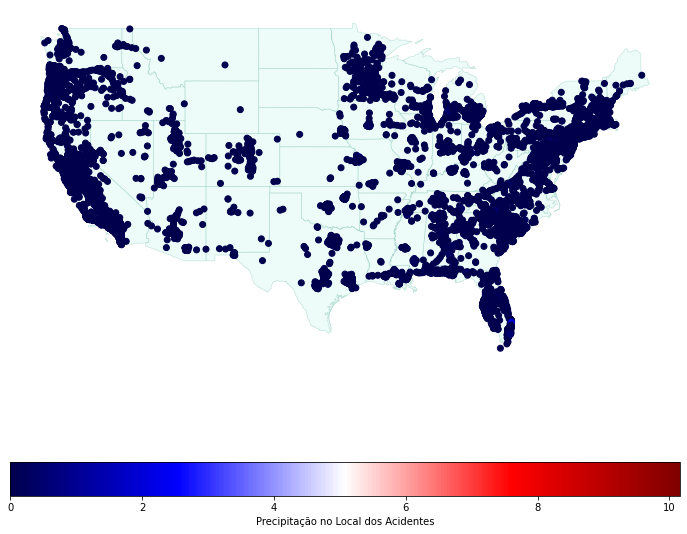

In [28]:
### Plotar Mapa Básico - Visualizar "Precipitation(in)" ###

fig, ax = plt.subplots(1, 1, figsize=(12,12))

US_states_new.plot(ax=ax,
                   color='#e1faf4',
                   alpha=0.6,
                   edgecolor="#99cfc2",
                   linewidth=0.6)

geo_US_accidents_sample.plot(ax= ax,
                             figsize=(12,12),
                             column='Precipitation(in)',
                             cmap='seismic',
                             legend=True,
                             legend_kwds={'label': "Precipitação no Local dos Acidentes",
                                          'orientation': "horizontal"})

ax.axis("off")
plt.show()

### Visualizações Importantes - Mapas Dinâmicos

In [29]:
columns = ['ID',
           'Severity',
           'Start_Lat',
           'Start_Lng',
           'Distance(mi)', 
           'City',
           'County',
           'State',
           'Zipcode',
           'Temperature(F)',
           'Humidity(%)', 
           'Precipitation(in)', 
           'Year',
           'Month',
           'Hour',
           'Weekday',
           'Time_Duration(min)',
           'geometry']

In [30]:
geo_US_accidents_sample_new = geo_US_accidents_sample[columns]
geo_US_accidents_sample_new.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
geo_US_accidentes_points = geo_US_accidents_sample_new.sample(2500)
geo_US_accidentes_points.head()

ID  Severity  Start_Lat   Start_Lng  Distance(mi)  \
1593359  A-1593392         2  33.938290  -81.148865          0.00   
264344    A-264346         2  30.192041  -97.698418          0.00   
2070780  A-2070820         2  35.226902  -80.836700          0.00   
11593      A-11594         2  38.655121 -121.033607          0.01   
238713    A-238715         2  40.116268  -76.305687          0.01   

                    City       County State     Zipcode  Temperature(F)  \
1593359    West Columbia    Lexington    SC  29170-1255            61.0   
264344            Austin       Travis    TX       78744            50.0   
2070780        Charlotte  Mecklenburg    NC  28202-2921            66.9   
11593    El Dorado Hills    El Dorado    CA       95762            46.4   
238713            Lititz    Lancaster    PA  17543-9272            39.9   

         Humidity(%)  Precipitation(in)  Year Month  Hour Weekday  \
1593359         62.0                NaN  2018   Oct     6     Thu   
264344          74.0                NaN  2016   Dec     9     Wed   
2070780         93.0               0.00  2018   Feb    11     Sun   
11593           93.0                NaN  2017   Jan    16     Wed   
238713          89.0               0.04  2016   Oct     7     Thu   

         Time_Duration(min)                     geometry  
1593359                30.0   POINT (-81.14887 33.93829)  
264344                 44.0   POINT (-97.69842 30.19204)  
2070780                30.0   POINT (-80.83670 35.22690)  
11593                  44.0  POINT (-121.03361 38.65512)  
238713                 45.0   POINT (-76.30569 40.11627)

#### Como saber quais cidades, condados e Estados possuem mais acidentes ?

In [32]:
### Plotar Acidentes ###

from folium.plugins import FastMarkerCluster

cmap = folium.Map([31, -100],
                  zoom_start=4)

FastMarkerCluster(data=list(zip(geo_US_accidentes_points.geometry.y.values,
                                geo_US_accidentes_points.geometry.x.values))).add_to(cmap)

folium.LayerControl().add_to(cmap)
cmap

#### Como saber a Severity dos acidentes conforme cidades, condados e Estados ?

In [33]:
locations = geo_US_accidentes_points[['Start_Lat','Start_Lng','Severity']]
locations.head()

Start_Lat   Start_Lng  Severity
1593359  33.938290  -81.148865         2
264344   30.192041  -97.698418         2
2070780  35.226902  -80.836700         2
11593    38.655121 -121.033607         2
238713   40.116268  -76.305687         2

In [34]:
### Plotar Acidentes ###

cmap = folium.Map([31, -100], zoom_start=4)

for lat, lng in zip(locations['Start_Lat'], locations['Start_Lng']):
    folium.CircleMarker(
        [lat, lng],
        color="red",
        radius=0.5).add_to(cmap)
    
folium.LayerControl().add_to(cmap)
cmap

In [35]:
### Plotar Acidentes ###

cmap = folium.Map([31, -100], zoom_start=4)

colors = ['green', 'yellow', 'orange', 'red']

for lat, lng, value in zip(locations['Start_Lat'], locations['Start_Lng'], locations['Severity']):
    folium.CircleMarker(
        [lat, lng],
        radius=value*2,
        color=colors[value-1],
        opacity=0.5,
        fill=True,
        fill_color=colors[value-1]
    ).add_to(cmap)
    
folium.LayerControl().add_to(cmap)
cmap

--------------

## Sigam a PowerOfData nas Redes Sociais:

- **[LinkedIn](https://www.linkedin.com/company/powerofdata/)**
- **[Medium](https://medium.com/powerofdata)**
- **[Instagram](https://www.instagram.com/powerofdatabr/)**
- Dúvidas, sugestões e *feedbacks*: gustavo.bruschi@powerofdata.com

### <center> **_Agradeço a leitura! Se você achou útil e interessante, por favor compartilhe com amigos e colegas._** </center>
--------------